<a href="https://colab.research.google.com/github/clarentcelsia/PyML/blob/master/forecasting/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disclaimer: 

This is just a summary of documentation of time series from some resources.

# Time Series

Mathematically, time series is a series of data points indexed in time order. Generally, a collection of observations of well-defined data items obtained through repeated measurements over time.<sup>1</sup> 

-------
<sup>1</sup>https://www.abs.gov.au/websitedbs/d3310114.nsf/home/time+series+analysis:+the+basics

## Import Time Series data
Typically stores in ```.csv``` files, so we're gonna use ```pandas.read_csv()``` to read csv file.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date') # Parse 'date' column to 'datetime' type
data.dtypes

value    float64
dtype: object

In [ ]:
data.head(5)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [ ]:
data.tail(5)

,value
date,
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
2008-05-01,22.912510
2008-06-01,19.431740


## Plotting
Visualizing time series data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams.update({'figure.figsize': (6, 4), 'figure.dpi': 120})

Text(0.5, 1.0, 'Date Plotting')

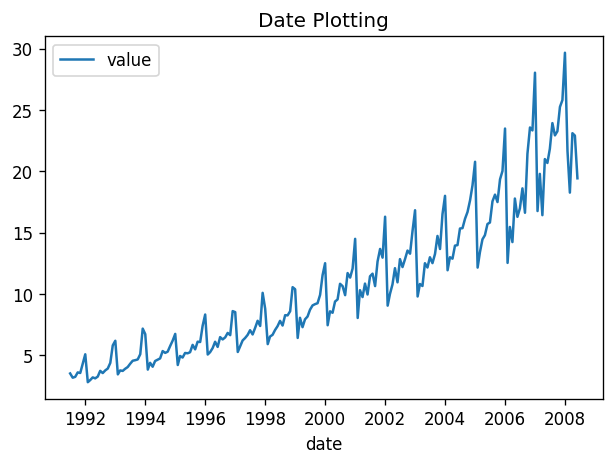

In [ ]:
sns.lineplot(data=data) # data.plot()

plt.title("Date Plotting")

## Decompose

Time series can be decomposed into 3 components:
1. Trend (long-term direction) 
2. Seasonal (systematic, calendar-related movement)
3. Irregular (unsystematic, short-term fluctuations)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Additive time series:**
  > Value = Base Level + Trend + Seasonality + Error

**Multiplicative Time Series:**
  > Value = Base Level x Trend x Seasonality x Error

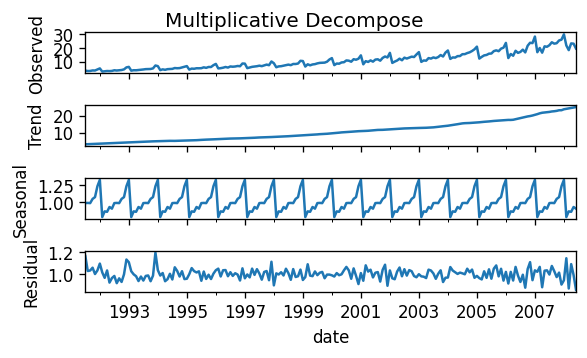

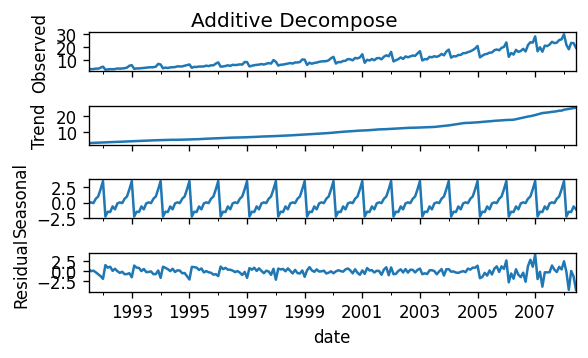

In [ ]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(data['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(data.value, model='additive', extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (5,3)})
result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
plt.show()

## Stationarity

Stationarity means that the manner in which time series data changes is constant (like mean, variance, autocorrelation). A stationary time series will not have any trends or seasonal patterns. You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).<sup>2 https://builtin.com/data-science/time-series-python</sup>

Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.
It's because forecasting the stationary series is more reliable.

*A stationary time series id devoid of seasonal effects as well.*

---

**Make a series stationary by differencing the series (once or more)* || taking the log of the series || taking n-th root of the series || combining all of the above.**

consider the given series = [2, 4, 12, 5, 4]
1st diff = [4-2, 12-4, 5-12, 4-5] = [2, 8, -7, -1]

<i><sup>*</sup>differencing the series is subtracting the next value with the current value</i>

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png" width=750></img>
<sup>https://www.machinelearningplus.com/time-series/time-series-analysis-python/</sup>

> ### Stationarity Test

Check whether the time series is stationary or not.

* split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.
This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root. **[ Augmented Dickey Fuller test (ADH Test), Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary), Philips Perron test (PP Test) ]**


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(data.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS
result = kpss(data.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067287
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**ADF**

**The more negative the statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).**

**p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

**p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.**


**KPSS**

The KPSS test is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADF test.

**Test Statistic <= Critical Value: Fail to reject the null hypothesis of the statistical test.**

**Test Statistic > Critical Value: Reject the null hypothesis of the statistical test.**

### Transform Dataset to be Stationary 
Remember to make a series stationary, one of which is to take log of the series. 

In [ ]:
from numpy import log

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col=['date'], squeeze=True) # Parse 'date' column to 'datetime' type
# squeeze : If the parsed data only contains one column then return a Series.
print(type(df)) # >>> series

df_array = df.values

df_array[2]

<class 'pandas.core.series.Series'>


3.252221

In [ ]:
df_log = log(df_array)

df_log[2]

1.1793381475560936

In [ ]:
# RE-TEST
result = adfuller(df_log)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.988733488947929
p-value: 0.7573512901699094
Critial Values:
   1%, -3.4654311561944873
Critial Values:
   5%, -2.8769570530458792
Critial Values:
   10%, -2.574988319755886


P-Values > 0.05 means the data is still non-stationary.

## Noise

White noise is not a function of time same as stationary which is its mean and variance doesnt change over time.
Time series is white noise if the variables are independent and distributed with mean of 0.

for example, you can consider the blank sound of radio between the channel is white noise.

It's important to consider because:
- **Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.**
- **Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise.**

Once predictions have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise.

When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predictions. All that is left is the random fluctuations that cannot be modeled.
https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=A%20time%20series%20is%20white%20noise%20if%20the%20variables%20are,other%20values%20in%20the%20series.

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


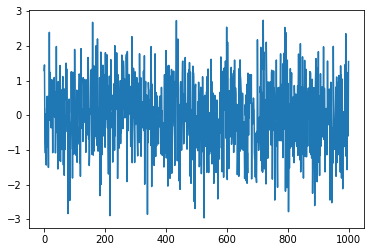

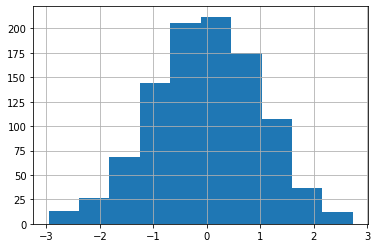

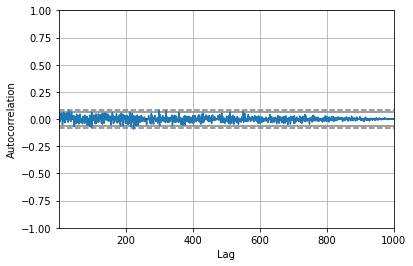

In [1]:
# Code sample from  https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=A%20time%20series%20is%20white%20noise%20if%20the%20variables%20are,other%20values%20in%20the%20series.

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
# summary stats
print(series.describe())
# line plot
series.plot()
pyplot.show()
# histogram plot
series.hist()
pyplot.show()
# autocorrelation
autocorrelation_plot(series)
pyplot.show()